In [121]:
#https://towardsdatascience.com/introduction-to-markov-chain-programming-8ddbe0ac1c84#:~:text=Markov%20Chain%20is%20a%20mathematical,predicting%20the%20next%20day's%20weather.
#alternative library PyDTMC
#https://pypi.org/project/PyDTMC/
import numpy as np
import random as rm
import pydtmc as pmc

In [116]:
states = ["sunny", "rainy"]
transitions = [["SS", "SR"],["RS", "RR"]]
T = [[0.9, 0.1],[0.5, 0.5]]

In [129]:
#p = [[0.2, 0.7, 0.0, 0.1], [0.0, 0.6, 0.3, 0.1], [0.0, 0.0, 1.0, 0.0], [0.5, 0.0, 0.5, 0.0]]
#mc = pmc.MarkovChain(p, ['A', 'B', 'C', 'D'])
p = [[0.9, 0.1],[0.5, 0.5]]

mc = pmc.MarkovChain(p, ["sunny", "rainy"])
print(mc)


DISCRETE-TIME MARKOV CHAIN
 SIZE:           2
 RANK:           2
 CLASSES:        1
  > RECURRENT:   1
  > TRANSIENT:   0
 ERGODIC:        YES
  > APERIODIC:   YES
  > IRREDUCIBLE: YES
 ABSORBING:      NO
 REGULAR:        YES
 REVERSIBLE:     YES
 SYMMETRIC:      NO



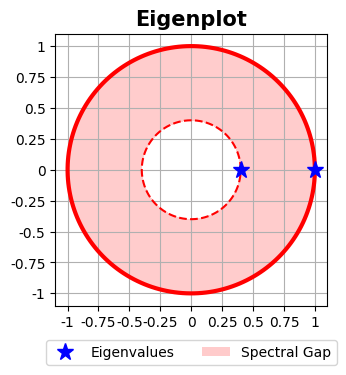

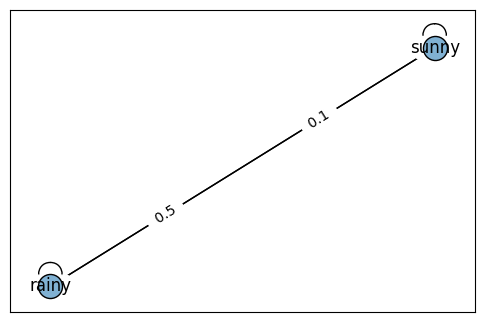

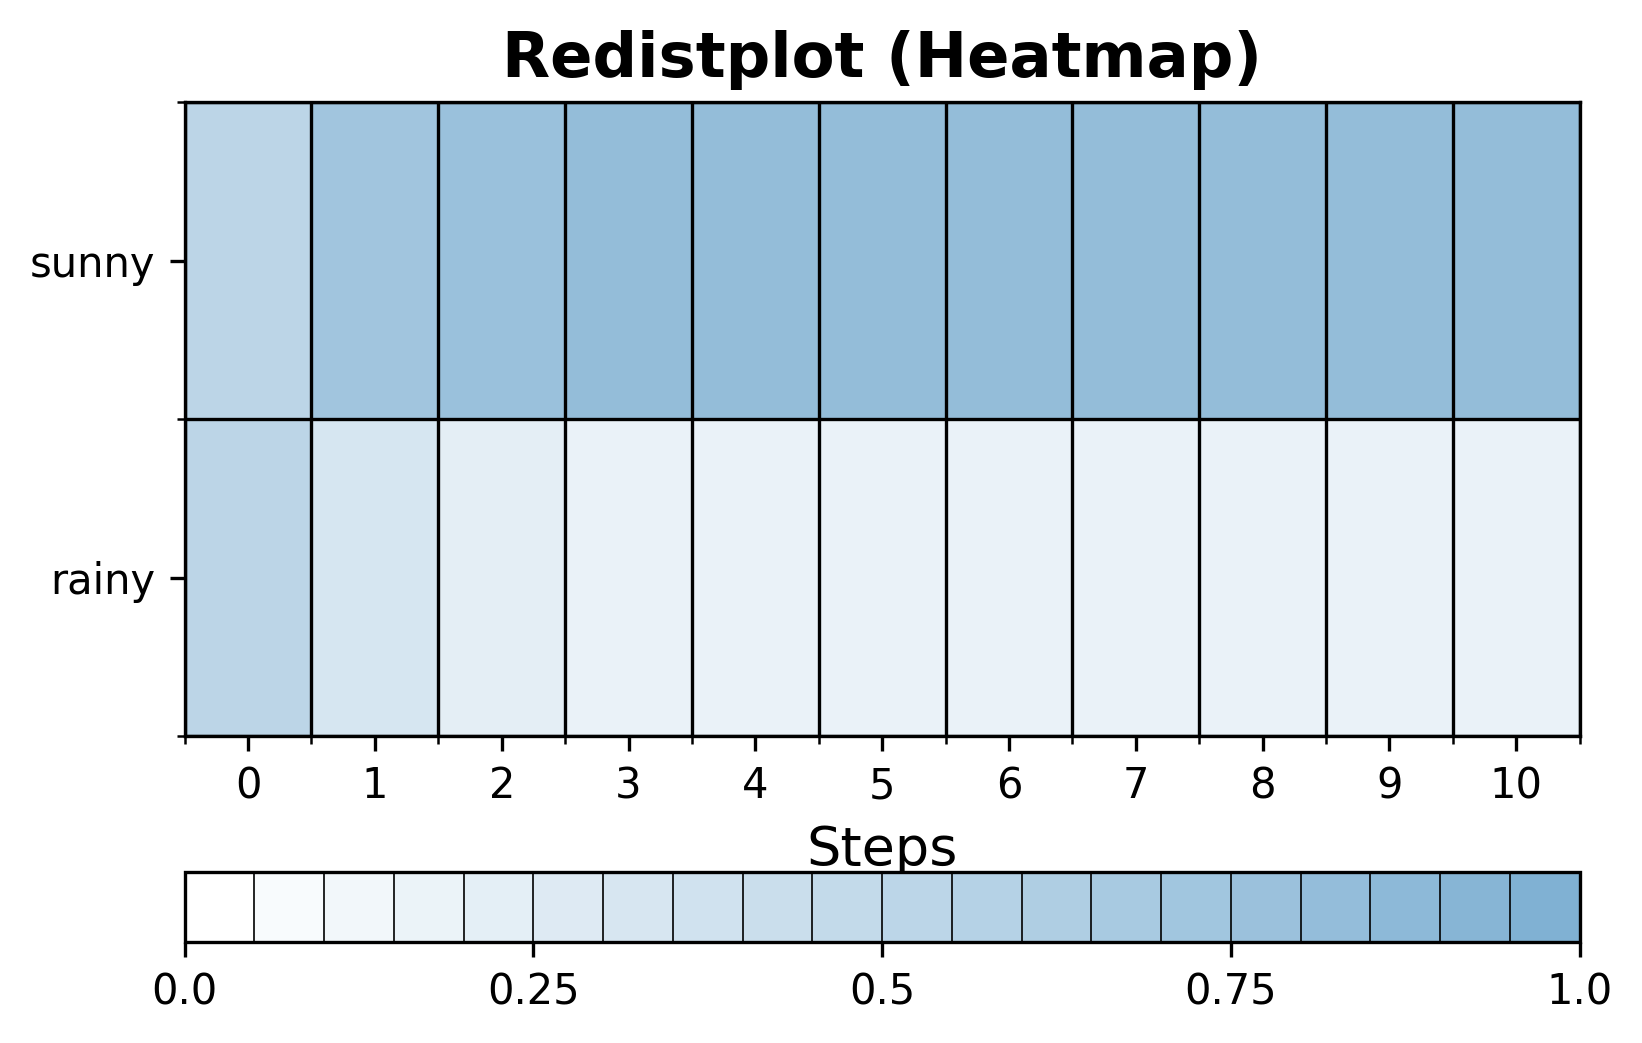

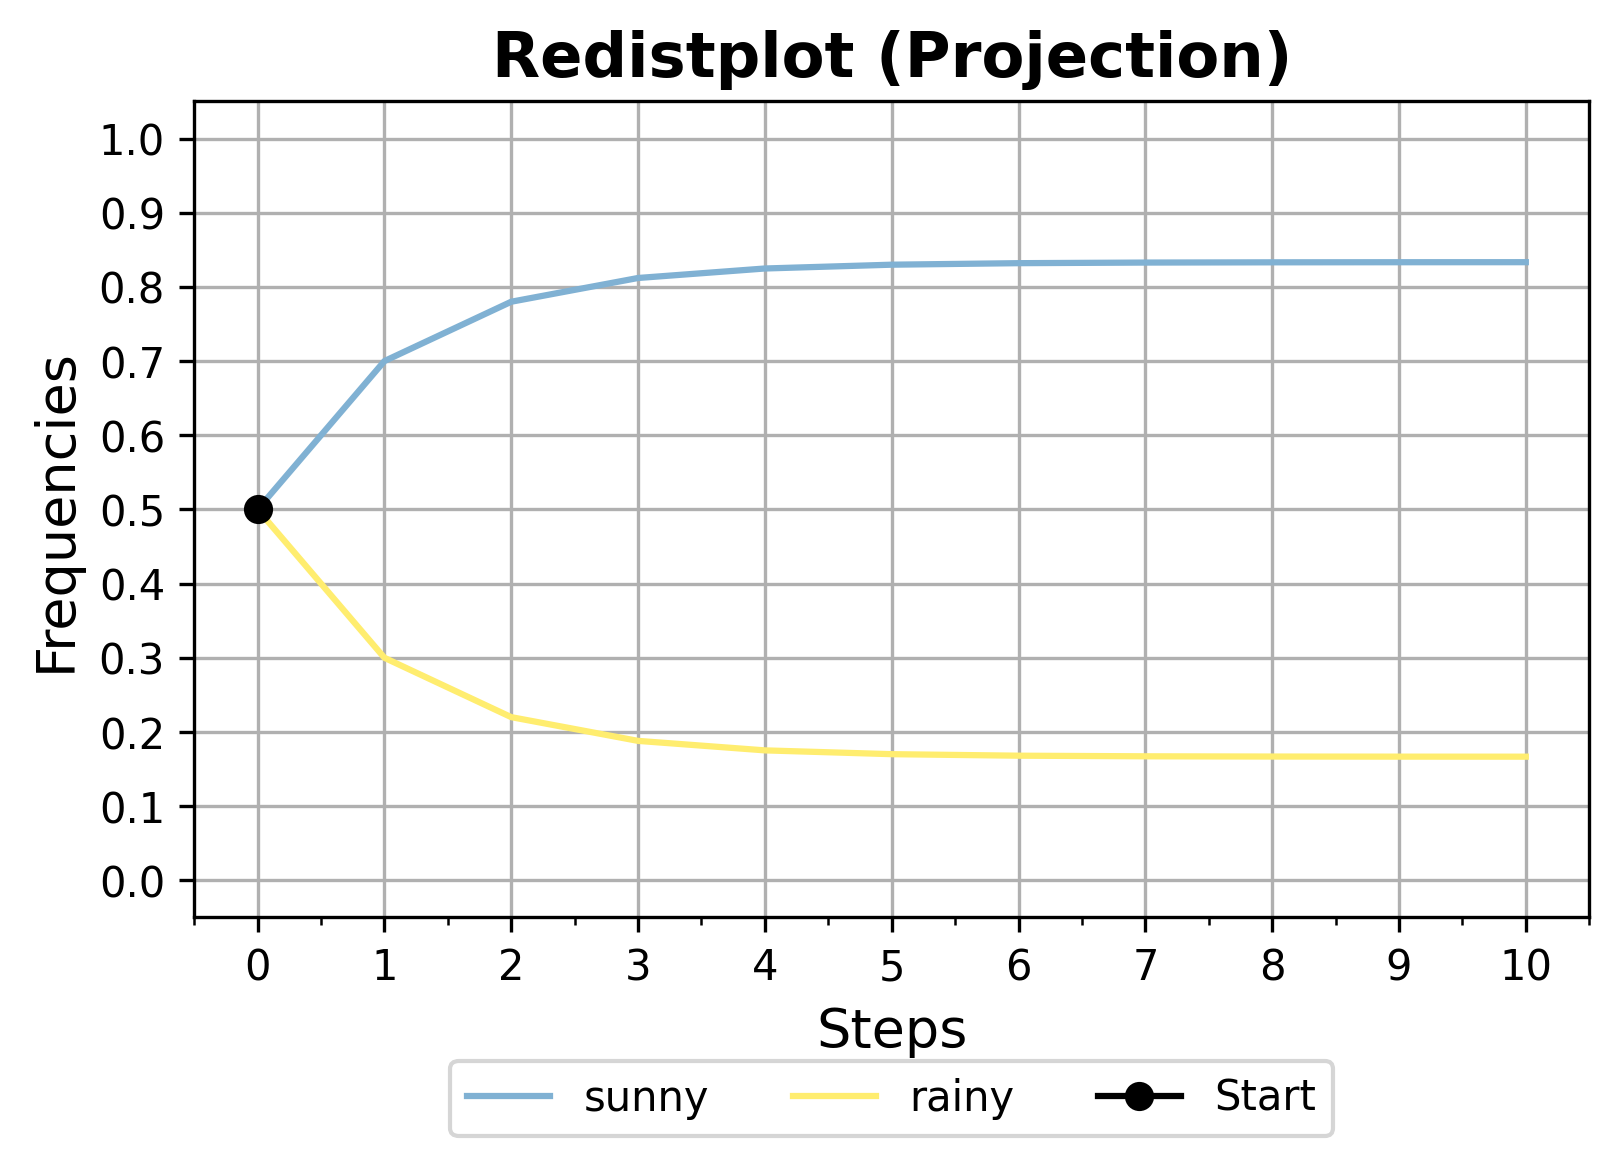

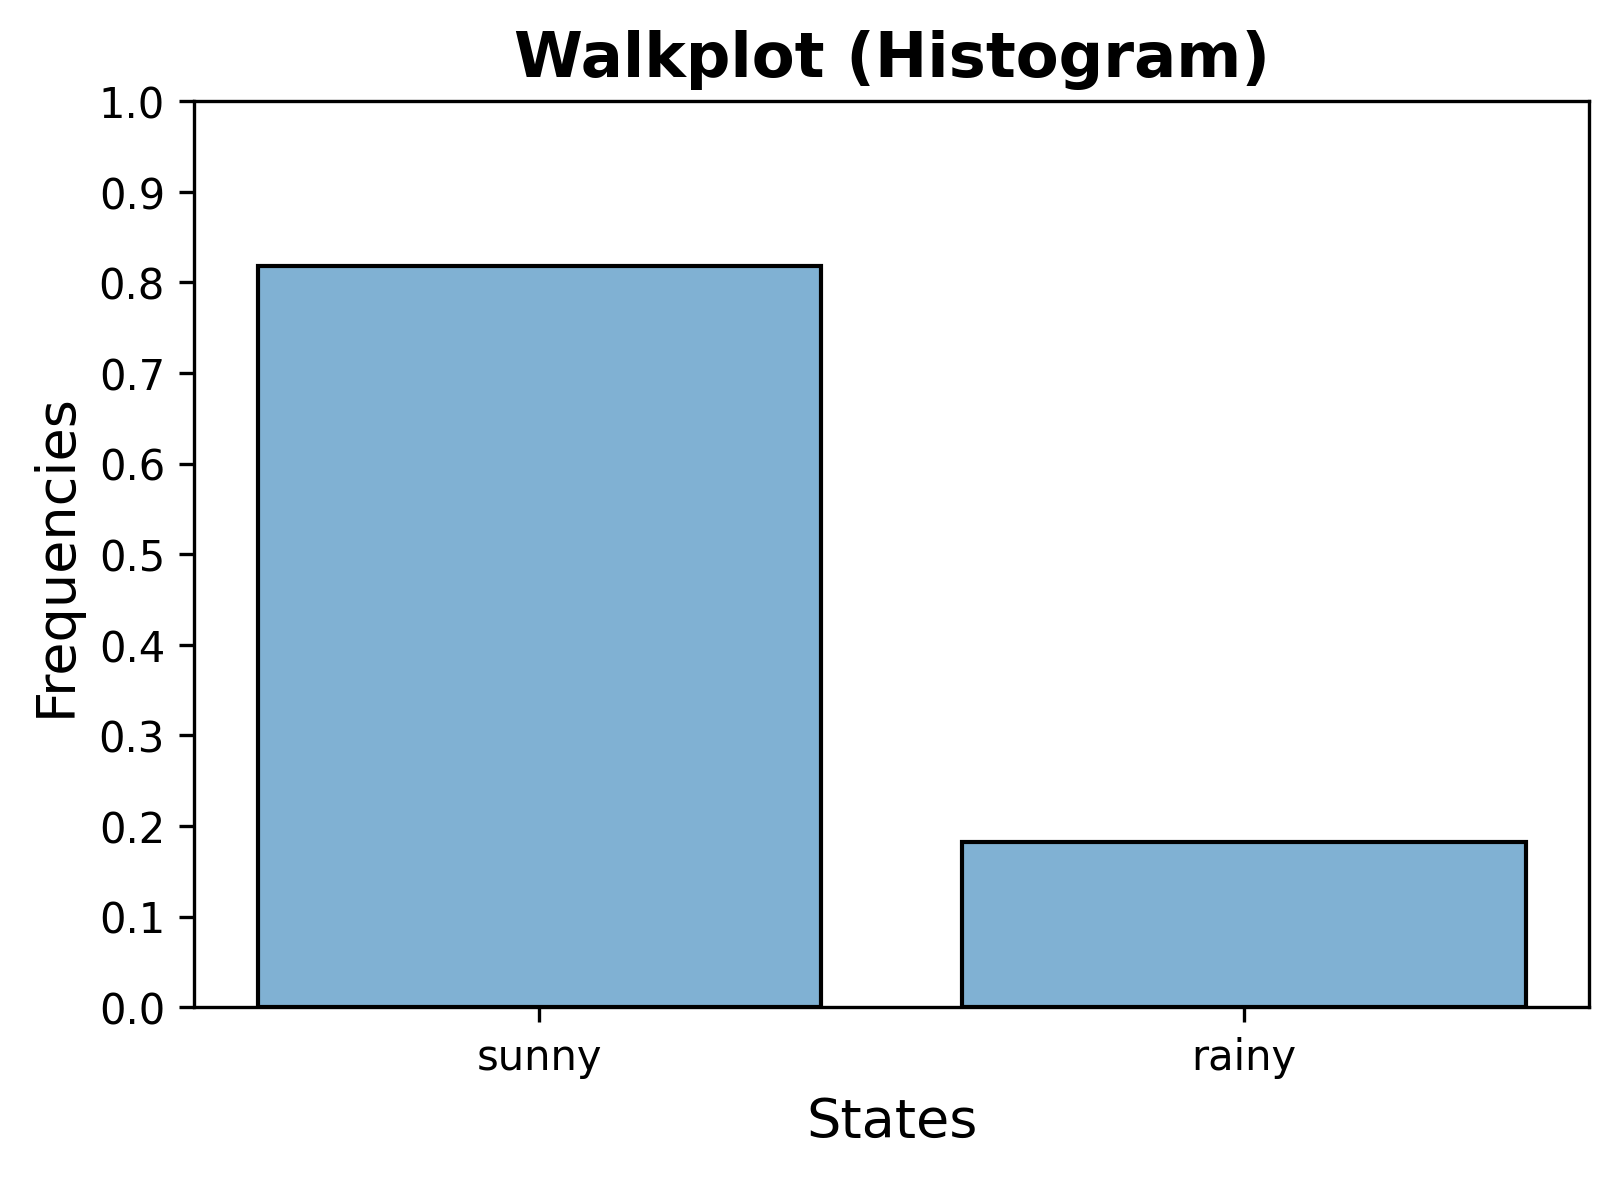

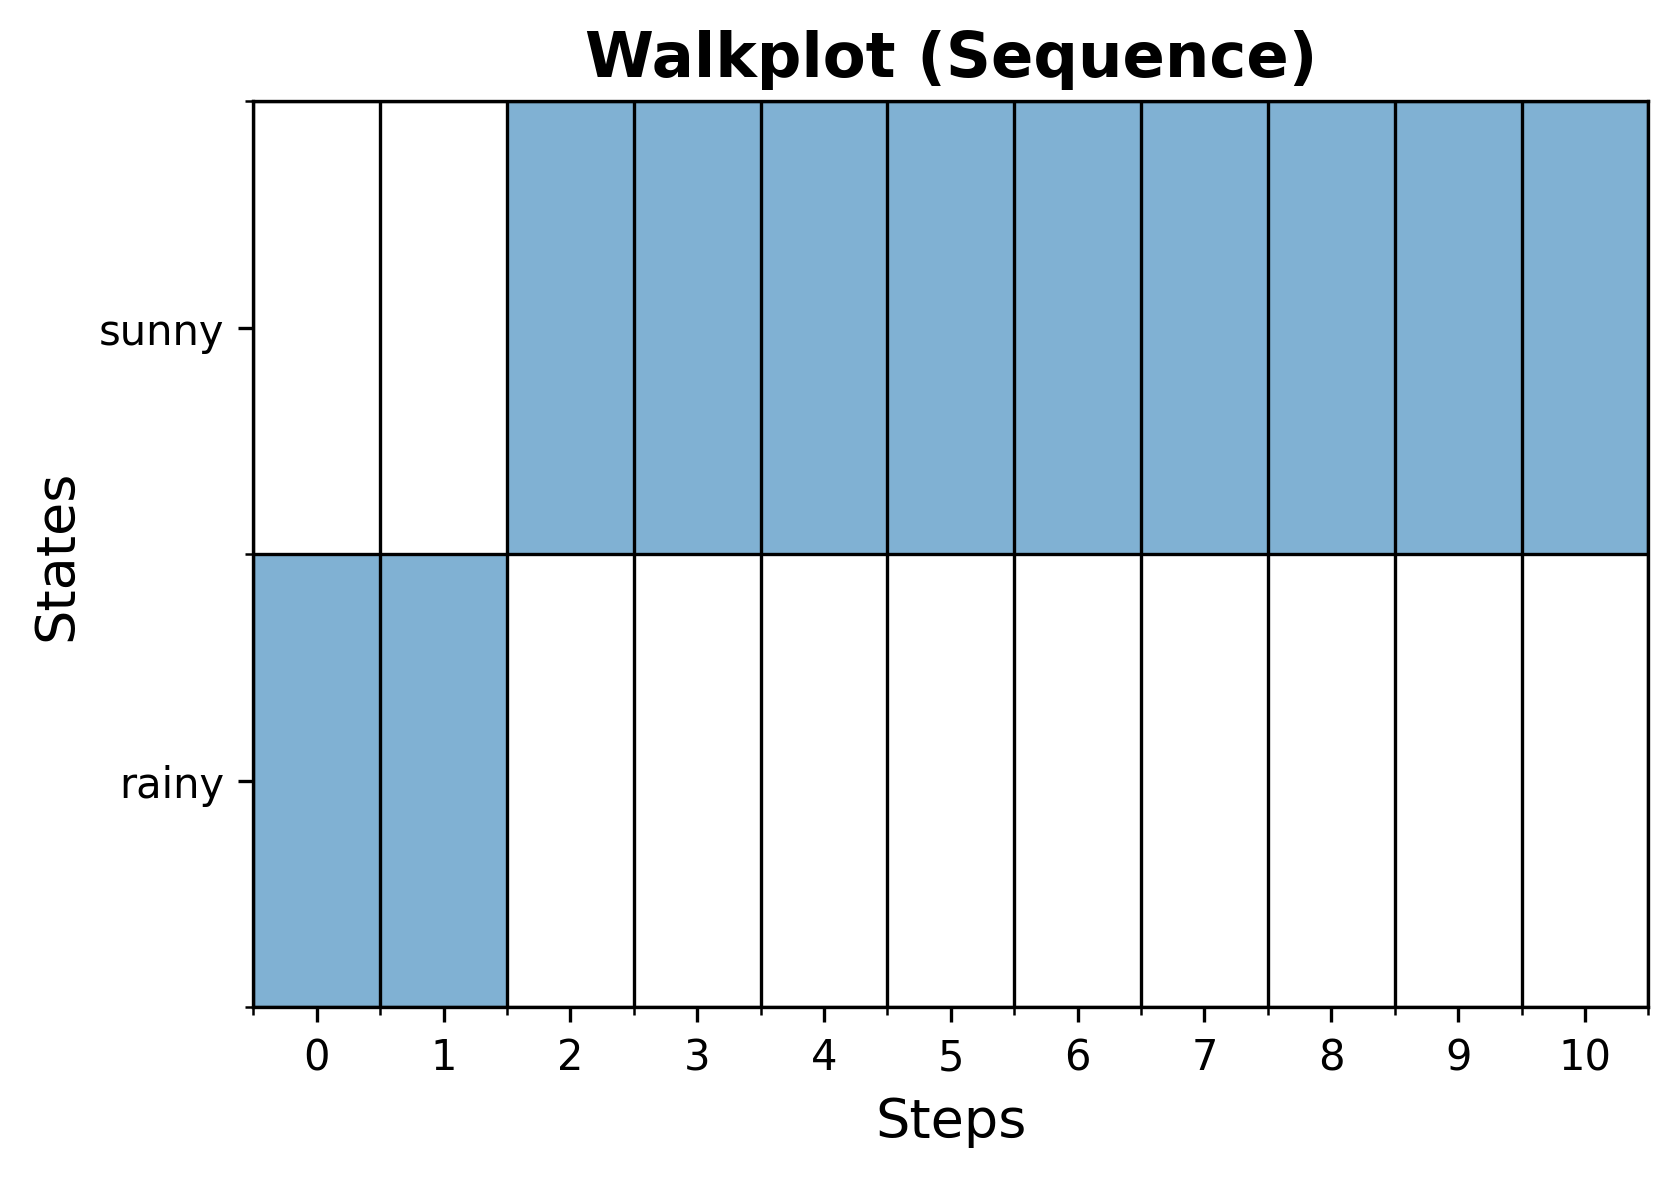

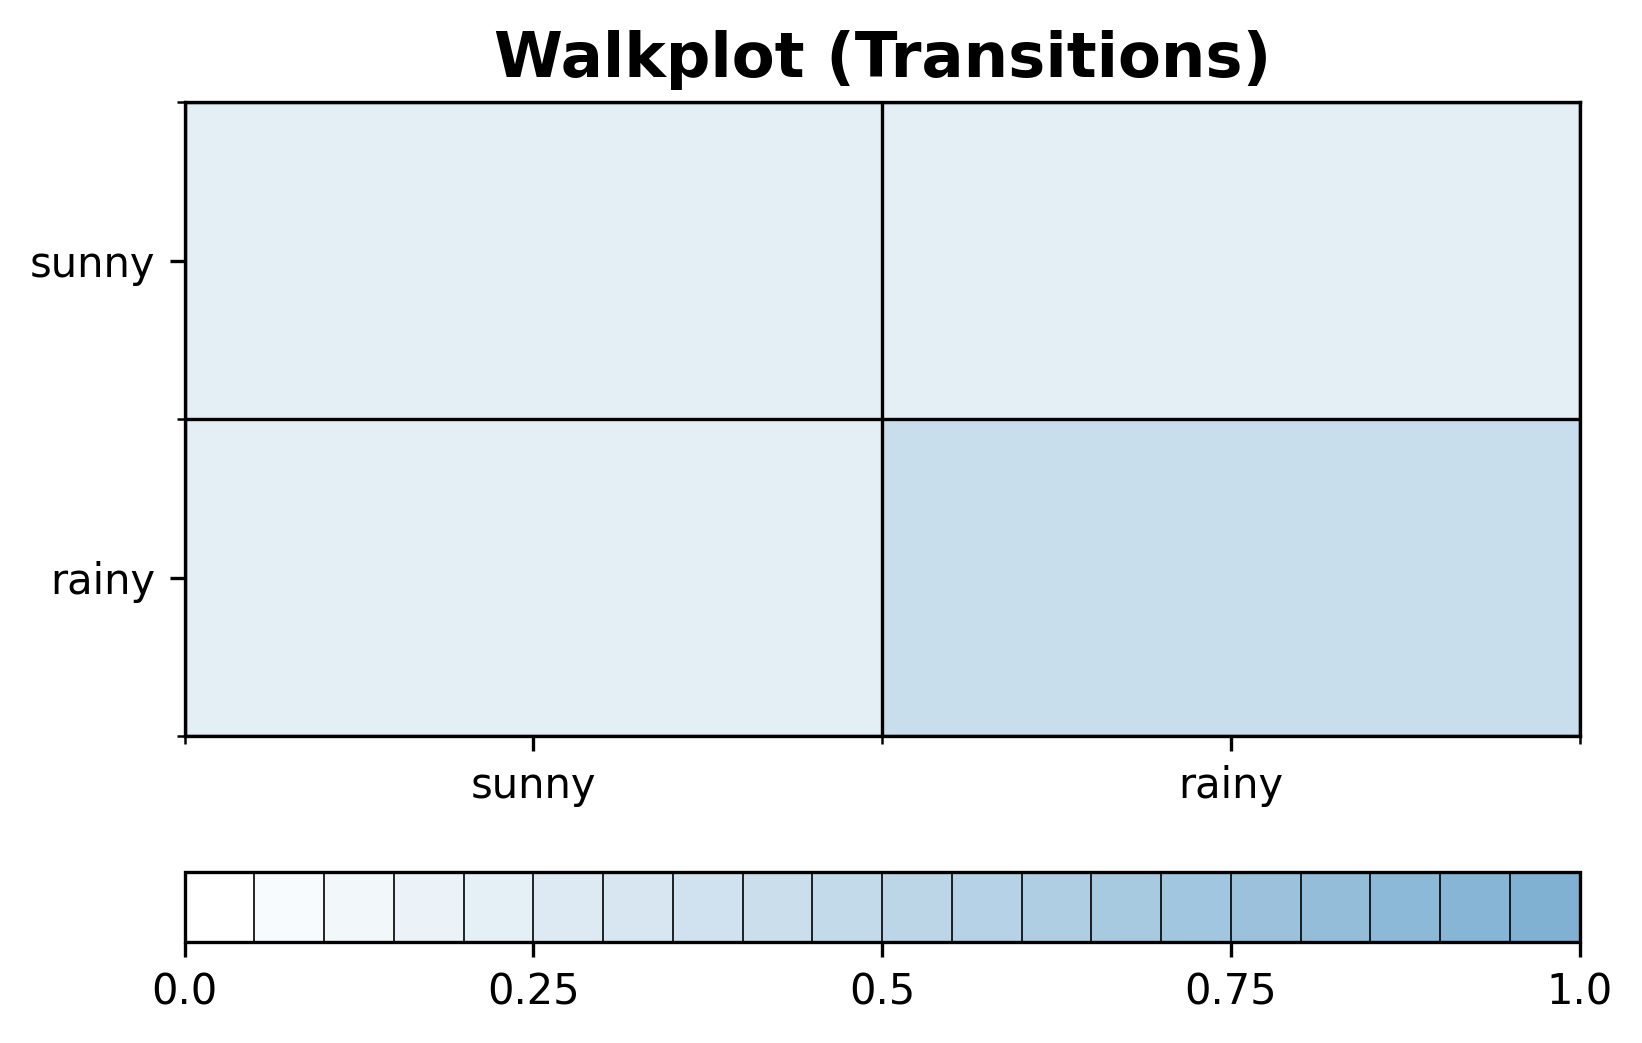

In [130]:
pmc.plot_eigenvalues(mc)
pmc.plot_graph(mc)
pmc.plot_redistributions(mc, 10, plot_type='heatmap', dpi=300)
pmc.plot_redistributions(mc, 10, plot_type='projection', dpi=300)
pmc.plot_walk(mc, 10, plot_type='histogram', dpi=300)
pmc.plot_walk(mc, 10, plot_type='sequence', dpi=300)
pmc.plot_walk(mc, 10, plot_type='transitions', dpi=300)

In [110]:
def weather_forecast(n_days, weather_today="sunny"):
    weather_list = [weather_today]
    n = 0
    prob = 1.0    
    while n != n_days:
        if weather_today == "sunny":
            change = np.random.choice(transitions[0], p=T[0])
            if change == "SS":
                prob = prob * T[0][0]
                weather_list.append(states[0])
            else:
                prob = prob * T[0][1]
                weather_list.append(states[1])        
                
        else:
            change = np.random.choice(transitions[1], p=T[1])
            if change == "RS":
                prob = prob * T[1][0]
                weather_list.append(states[0])
            else:
                prob = prob * T[1][1]
                weather_list.append(states[1])        
        n = n + 1        
    return weather_list

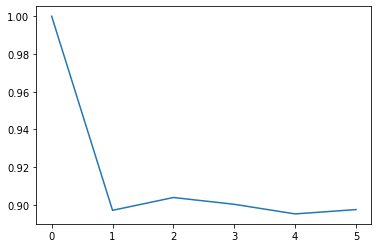

In [111]:
ndays = 5
prediction = np.zeros(shape=(ndays+1))
tests = 10000

import matplotlib.pyplot as plt

for i in range(0,tests):
    future_weathers = weather_forecast(n_days = ndays)
    prediction += np.where(np.array(future_weathers)=='sunny',1,0)
    
plt.plot(prediction/tests)


In [128]:
prediction/tests

array([1.    , 0.8971, 0.9039, 0.9003, 0.8952, 0.8975])